In [1]:
# import modules

import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from datetime import datetime

# read the data into a dataframe
data_path = 'Data/sales_data_sample.csv'

# read the data as a datetime object not as a string
d_parser = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
data = pd.read_csv(data_path, parse_dates=['ORDERDATE'], date_parser=d_parser)

# print the start of the data out
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Preliminary queries to understand the content

#### these queries are aimed to get an idea of the types of data in this set, as well as the shape, the existence of outliers, etc.

In [3]:
# cool technique to get the missing values per column

missing_data_percentages = (
    data.isna().sum().sort_values(ascending = False)/len(data))*100


missing_data_percentages

ADDRESSLINE2        89.302161
STATE               52.639036
TERRITORY           38.044633
POSTALCODE           2.692171
ORDERNUMBER          0.000000
CUSTOMERNAME         0.000000
CONTACTFIRSTNAME     0.000000
CONTACTLASTNAME      0.000000
COUNTRY              0.000000
CITY                 0.000000
ADDRESSLINE1         0.000000
PHONE                0.000000
PRODUCTCODE          0.000000
QUANTITYORDERED      0.000000
MSRP                 0.000000
PRODUCTLINE          0.000000
YEAR_ID              0.000000
MONTH_ID             0.000000
QTR_ID               0.000000
STATUS               0.000000
ORDERDATE            0.000000
SALES                0.000000
ORDERLINENUMBER      0.000000
PRICEEACH            0.000000
DEALSIZE             0.000000
dtype: float64

In [4]:
# another technique to sum the nas by column
data.isnull().sum().sort_values(ascending = False)

ADDRESSLINE2        2521
STATE               1486
TERRITORY           1074
POSTALCODE            76
ORDERNUMBER            0
CUSTOMERNAME           0
CONTACTFIRSTNAME       0
CONTACTLASTNAME        0
COUNTRY                0
CITY                   0
ADDRESSLINE1           0
PHONE                  0
PRODUCTCODE            0
QUANTITYORDERED        0
MSRP                   0
PRODUCTLINE            0
YEAR_ID                0
MONTH_ID               0
QTR_ID                 0
STATUS                 0
ORDERDATE              0
SALES                  0
ORDERLINENUMBER        0
PRICEEACH              0
DEALSIZE               0
dtype: int64

In [5]:
# drop unneeded or unhelpful columns
cols_to_drop = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE']

data.drop(cols_to_drop, axis = 1, inplace = True)

In [6]:
# get information on the data - confirm the date column was properly converted to a datetime type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  CITY              2823 n

In [7]:
# get the shape of the data
data.shape

(2823, 20)

# Customer Breakdown

In [8]:
import matplotlib.pyplot as plt

# note this calculates total sales over the period; for a more nuanced breakdown of customer sales see further analysis
# save a list of countries so user can select an appropriate country in the dataset
country_list = []

for country in data['COUNTRY'].unique():
    country_list.append(country)

def customer_by_country(df):

    # get input from user on what country they want to review
    country = input(f'input your country from this list: {country_list}')

    # narrow down by that country and select desired dataframes
    country_df = data.loc[data['COUNTRY'] == country]
    cleaned_df = country_df[['CUSTOMERNAME', 'SALES', 'COUNTRY', 'ORDERDATE']]
    grouped_df = cleaned_df.groupby(['CUSTOMERNAME']).sum().sort_values(by=['SALES'], ascending = False)

    # store necessary values in list
    customers = [customer for customer in grouped_df.index]
    sales = [sales for sales in grouped_df['SALES']]

    # plotting the figure to the following specifications
    plt.figure(figsize = (15,5))
    plt.title(f'{country} Most Valueable Customer (2003 - 2005)', fontsize = 18)
    plt.bar(customers, sales, color = '#37C6AB', edgecolor = 'black', linewidth = 1)
    plt.xlabel('Customer Name', fontsize = 15) #x axis shows the customer name
    plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
    plt.xticks(fontsize = 12, rotation = 90)
    plt.yticks(fontsize = 12)
 
    return plt.show()

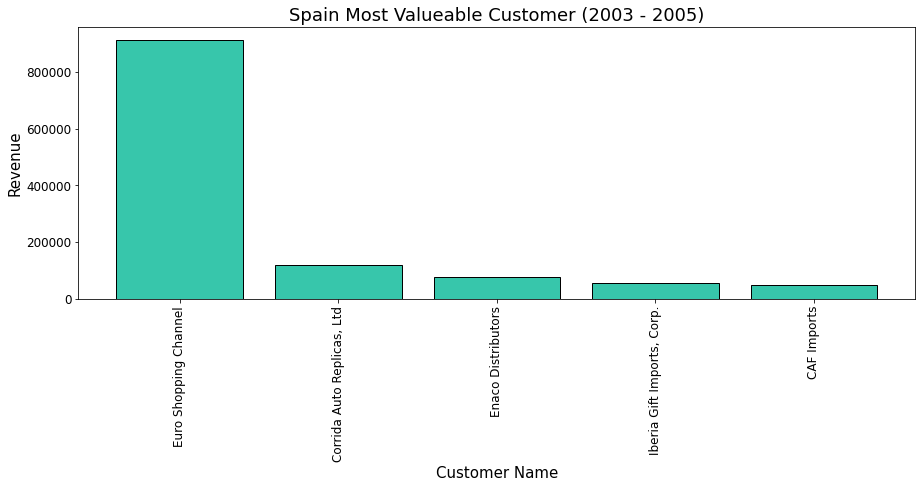

In [9]:
# spain customer breakdown
spain_customers = customer_by_country(data)

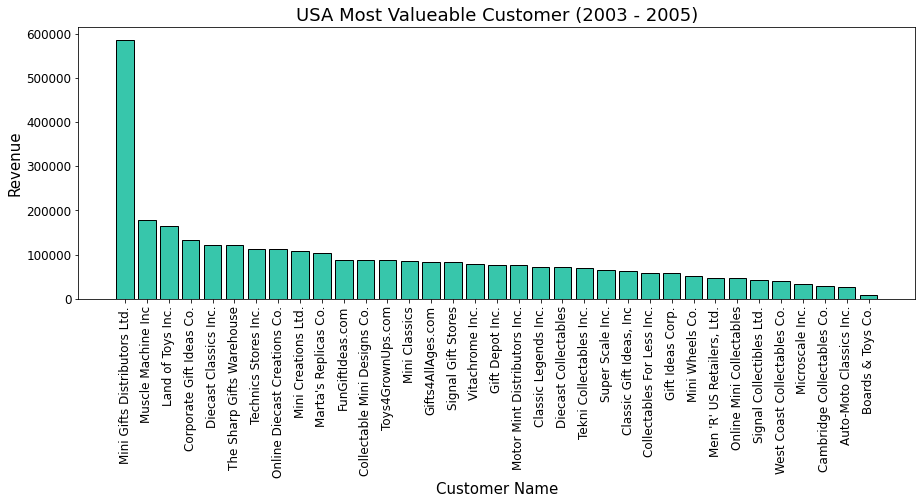

<Figure size 432x288 with 0 Axes>

In [45]:
# usa customer breakdown
usa_customers = customer_by_country(data)

plt.savefig("./usa_customers_python.png")

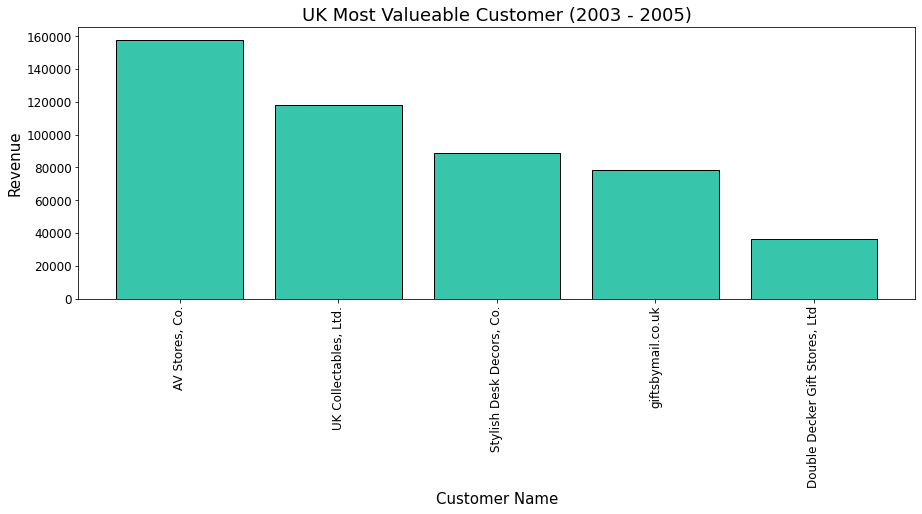

In [11]:
# united kingdom customer breakdown
uk_customers = customer_by_country(data)

# Generate a Tabular Data Report

In [12]:
# for users interested in tablular data; the following function provides a report of customers by country
# this function generates a dataframe grouped by country and offers the following insights for each customer
# this report will serve as the foundation for a RFM analysis


def customer_report(data):

    # create the initial dataframe
    total_customer_df = data[['COUNTRY', 'CUSTOMERNAME', 'ORDERDATE', 'SALES']]

    # create the aggregated dataframe, groupby country
    aggregated_customer_df = total_customer_df.groupby(['COUNTRY', 'CUSTOMERNAME']).agg({'SALES': ['mean', 'min', 'max', 'sum', 'count'], 
                    'ORDERDATE': ['max', 'min']})

    # rename the columns
    aggregated_customer_df.columns = ['mean sales', 'min sale', 'max sale', 'total sales', 'number of transactions', 
                'recent order date', 'oldest order date']

    return aggregated_customer_df



In [13]:
# generate the report

total_report = customer_report(data)

total_report.head(20)

mean sales  min sale  max sale  \
COUNTRY   CUSTOMERNAME                                                         
Australia Anna's Decorations, Ltd            3347.741957   1035.58   8470.14   
          Australian Collectables, Ltd       2808.324348    759.46   8427.02   
          Australian Collectors, Co.         3654.462000   1237.95   9774.03   
          Australian Gift Network, Co        3964.608000   1172.60   8014.82   
          Souveniers And Things Co.          3295.021304    652.35   7956.46   
Austria   Mini Auto Werke                    3484.260000   1262.80   6563.06   
          Salzburg Collectables              3744.965750    640.05   9240.00   
Belgium   Petit Auto                         2998.900800    881.40   6804.63   
          Royale Belge                       4180.012500   1637.20   6275.72   
Canada    Canadian Gift Exchange Network     3419.950909   1119.93   9064.89   
          Quebec Home Shopping Network       3372.945000   1277.64   6232.00   
          Royal Canadian Collectables, Ltd.  2870.571154   1449.35   5795.54   
Denmark   Danish Wholesale Imports           4028.933333   1146.50  10468.90   
          Heintze Collectables               3725.761111   1226.59   7975.44   
Finland   Oulu Toy Supplies, Inc.            3261.574375    891.20   7110.91   
          Suominen Souveniers                3798.705000    891.03  10606.20   
          Toys of Finland, Co.               3708.346000   1013.76   7947.31   
France    Alpha Cognac                       3524.422000   1463.00   8331.61   
          Atelier graphique                  3454.280000   1550.72   5331.88   
          Auto Assoc. & Cie.                 3601.906667    694.60  10172.70   

                                             total sales  \
COUNTRY   CUSTOMERNAME                                     
Australia Anna's Decorations, Ltd              153996.13   
          Australian Collectables, Ltd          64591.46   
          Australian Collectors, Co.           200995.41   
          Australian Gift Network, Co           59469.12   
          Souveniers And Things Co.            151570.98   
Austria   Mini Auto Werke                       52263.90   
          Salzburg Collectables                149798.63   
Belgium   Petit Auto                            74972.52   
          Royale Belge                          33440.10   
Canada    Canadian Gift Exchange Network        75238.92   
          Quebec Home Shopping Network          74204.79   
          Royal Canadian Collectables, Ltd.     74634.85   
Denmark   Danish Wholesale Imports             145041.60   
          Heintze Collectables                 100595.55   
Finland   Oulu Toy Supplies, Inc.              104370.38   
          Suominen Souveniers                  113961.15   
          Toys of Finland, Co.                 111250.38   
France    Alpha Cognac                          70488.44   
          Atelier graphique                     24179.96   
          Auto Assoc. & Cie.                    64834.32   

                                             number of transactions  \
COUNTRY   CUSTOMERNAME                                                
Australia Anna's Decorations, Ltd                                46   
          Australian Collectables, Ltd                           23   
          Australian Collectors, Co.                             55   
          Australian Gift Network, Co                            15   
          Souveniers And Things Co.                              46   
Austria   Mini Auto Werke                                        15   
          Salzburg Collectables                                  40   
Belgium   Petit Auto                                             25   
          Royale Belge                                            8   
Canada    Canadian Gift Exchange Network                         22   
          Quebec Home Shopping Network                           22   
          Royal Canadian Collectables, Lt

In [14]:
# generates a similar report, but narrows by the country specified

def customer_by_country_report(data):

    country = input(f'select a country from the country list: {country_list}')

    data = data.loc[data['COUNTRY'] == country]

    # create the initial dataframe
    total_customer_df = data[['COUNTRY', 'CUSTOMERNAME', 'ORDERDATE', 'SALES']]

    # create the aggregated dataframe, groupby country
    aggregated_customer_df = total_customer_df.groupby(['COUNTRY', 'CUSTOMERNAME']).agg({'SALES': ['mean', 'min', 'max', 'sum', 'count'], 
                    'ORDERDATE': ['max', 'min']})

    # rename the columns and eliminate the multiindex to allow to sort by mean sales
    aggregated_customer_df.columns = ['mean sales', 'min sale', 'max sale', 'total sales', 'number of transactions', 
                'recent order date', 'oldest order date']

    # sort by mean sales for ease of reference              
    final_df = aggregated_customer_df.sort_values(by=['number of transactions'], ascending = False)

    return final_df

In [15]:
# generate a us report
usa_report = customer_by_country_report(data)

usa_report.head(10)

mean sales  min sale  max sale  \
COUNTRY CUSTOMERNAME                                                    
USA     Mini Gifts Distributors Ltd.  3638.100333    717.40  11623.70   
        Land of Toys Inc.             3348.355918   1172.34   7140.76   
        Muscle Machine Inc            4119.519583   1213.80  11279.20   
        Corporate Gift Ideas Co.      3655.670732   1007.14   8296.35   
        The Sharp Gifts Warehouse     4000.256750    541.14  14082.80   
        Mini Creations Ltd.           3112.889429    972.40   7886.20   
        Online Diecast Creations Co.  3873.097059    917.70  12536.50   
        Technics Stores Inc.          3552.443235   1142.41   7374.10   
        Diecast Classics Inc.         3939.940000    813.20   7962.24   
        Toys4GrownUps.com             3485.398667    834.67   8884.80   

                                      total sales  number of transactions  \
COUNTRY CUSTOMERNAME                                                        
USA     Mini Gifts Distributors Ltd.    654858.06                     180   
        Land of Toys Inc.               164069.44                      49   
        Muscle Machine Inc              197736.94                      48   
        Corporate Gift Ideas Co.        149882.50                      41   
        The Sharp Gifts Warehouse       160010.27                      40   
        Mini Creations Ltd.             108951.13                      35   
        Online Diecast Creations Co.    131685.30                      34   
        Technics Stores Inc.            120783.07                      34   
        Diecast Classics Inc.           122138.14                      31   
        Toys4GrownUps.com               104561.96                      30   

                                     recent order date oldest order date  
COUNTRY CUSTOMERNAME                                                      
USA     Mini Gifts Distributors Ltd.        2005-05-29        2003-03-26  
        Land of Toys Inc.                   2004-11-15        2003-02-24  
        Muscle Machine Inc                  2004-12-01        2003-06-03  
        Corporate Gift Ideas Co.            2005-02-23        2003-10-10  
        The Sharp Gifts Warehouse           2005-04-22        2004-05-11  
        Mini Creations Ltd.                 2005-01-07        2003-08-10  
        Online Diecast Creations Co.        2004-11-04        2003-01-06  
        Technics Stores Inc.                2005-01-05        2003-07-24  
        Diecast Classics Inc.               2005-05-30        2004-07-20  
        Toys4GrownUps.com                   2005-01-12        2003-08-25

In [16]:
# generate a french report
france_report = customer_by_country_report(data)

france_report.head()

mean sales  min sale  max sale  total sales  \
COUNTRY CUSTOMERNAME                                                           
France  La Rochelle Gifts       3398.583019    482.13  10039.60    180124.90   
        Reims Collectables      3293.730244    977.67   8284.00    135042.94   
        Saveley & Henriot, Co.  3484.737805   1161.12   8602.92    142874.25   
        Auto Canal Petit        3450.765185   1338.12   7498.90     93170.66   
        Marseille Mini Autos    2997.445600    703.60   7650.00     74936.14   

                                number of transactions recent order date  \
COUNTRY CUSTOMERNAME                                                       
France  La Rochelle Gifts                           53        2005-05-31   
        Reims Collectables                          41        2005-03-30   
        Saveley & Henriot, Co.                      41        2004-03-02   
        Auto Canal Petit                            27        2005-04-07   
        Marseille Mini Autos                        25        2005-01-06   

                               oldest order date  
COUNTRY CUSTOMERNAME                              
France  La Rochelle Gifts             2004-07-23  
        Reims Collectables            2003-05-07  
        Saveley & Henriot, Co.        2003-11-25  
        Auto Canal Petit              2004-01-15  
        Marseille Mini Autos          2003-05-08

In [17]:
# Create an RFM Table using the same strategy as above, but with targeted columns

# create the initial dataframe
rfm_df = data[['CUSTOMERNAME', 'ORDERDATE', 'SALES']]

# most recent date from the dataframe
recent_date = rfm_df['ORDERDATE'].max()

# create the aggregated dataframe, groupby country
aggregated_rfm_df = rfm_df.groupby(['CUSTOMERNAME']).agg({
                'ORDERDATE': [lambda x: (recent_date - x.max())],
                'SALES': ['count', 'sum']
                })

# rename the columns and eliminate the multiindex to allow to sort by mean sales
aggregated_rfm_df.columns = ['Recency', 'Frequency', 'Monetary Value']

aggregated_rfm_df.head()

,Recency,Frequency,Monetary Value
CUSTOMERNAME,,,
"AV Stores, Co.",195 days,51,157807.81
Alpha Cognac,64 days,20,70488.44
Amica Models & Co.,264 days,26,94117.26
"Anna's Decorations, Ltd",83 days,46,153996.13
Atelier graphique,187 days,7,24179.96


In [19]:
# TODO begin work on completing the RFM analysis

# Sales by Country

In [18]:
# groupby country to get the highest total 
grouped_country = data.groupby('COUNTRY').agg({'SALES': ['sum']})

#  identify the top sales countries
sales_by_country = grouped_country.apply(lambda x: x.sort_values(ascending=False))

# reset index
sales_by_country.reset_index(inplace=True)

# rename columns
sales_by_country.columns = ['country', 'total_sales']

# save the top ten countries
top_countries = sales_by_country.country[0:10]

# locate in the original dataframe
top_ten_df = sales_by_country.loc[sales_by_country['country'].isin(top_countries)]

sales_by_country.head(19)

,country,total_sales
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


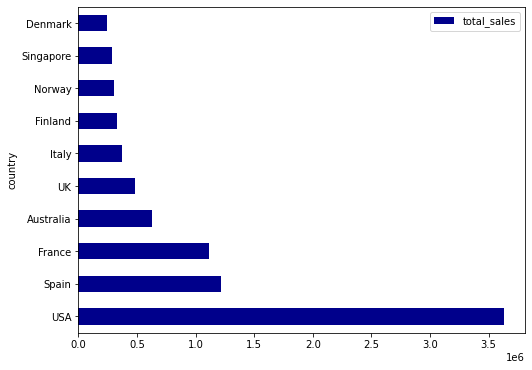

In [44]:
# plot a bar chart to view the results graphically
ax = top_ten_df.plot.barh(x = 'country', y = 'total_sales', figsize = (8, 6), color = 'darkblue', rot = 0)

plt.savefig("./top_ten_country_python.png")

# Product by Country Analysis

In [20]:
# break the top ten data into three separate dataframes by year

def product_breakdown(data):

    # save desired country as a variable
    country = input(f'select a country from the country list: {country_list}')

    # pull the data for that specific country

    country_df = data.loc[data['COUNTRY'] == country]

    # 2003
    df_2003 = country_df.loc[pd.DatetimeIndex(country_df['ORDERDATE']).year == 2003]

    # 2004
    df_2004 = country_df.loc[pd.DatetimeIndex(country_df['ORDERDATE']).year == 2004]

    # 2005
    df_2005 = country_df.loc[pd.DatetimeIndex(country_df['ORDERDATE']).year == 2005]

    # analysis of country sales for 2003
    grouped_productline_2003 = df_2003.groupby(['COUNTRY', 'PRODUCTLINE']).agg({'SALES': ['sum']})
    indexed_2003  = grouped_productline_2003.reset_index()
    indexed_2003.columns = ['country', 'product', '2003 sales']

    # analysis of country sales for 2004
    grouped_productline_2004 = df_2004.groupby(['COUNTRY', 'PRODUCTLINE']).agg({'SALES': ['sum']})
    indexed_2004  = grouped_productline_2004.reset_index()
    indexed_2004.columns = ['country', 'product', '2004 sales']

    # analysis of country sales for 2005
    grouped_productline_2005 = df_2005.groupby(['COUNTRY', 'PRODUCTLINE']).agg({'SALES': ['sum']})
    indexed_2005  = grouped_productline_2005.reset_index()
    indexed_2005.columns = ['country', 'product', '2005 sales']

    # merge the two dataframes
    merged_df = pd.merge(indexed_2003, indexed_2004, how ='outer', left_on=['country', 'product'], right_on=['country', 'product'])

    # merge the final dataframes
    complete_df = pd.merge(merged_df, indexed_2005, how ='outer', left_on=['country', 'product'], right_on=['country', 'product'])

    # compile the data for graphing; drop the unnecessary country index
    t = complete_df.set_index('product').transpose()
    t.drop(['country'], inplace=True)

    # plot the graph and return the value
    return t.plot(kind='bar', stacked=True)


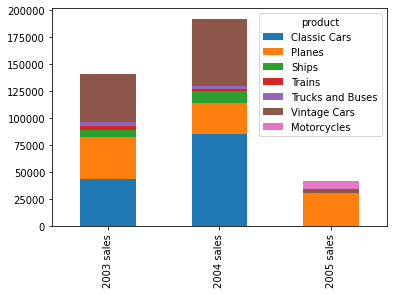

In [21]:
italy_products = product_breakdown(data)

plt.savefig("./italy_product_stacked.png")

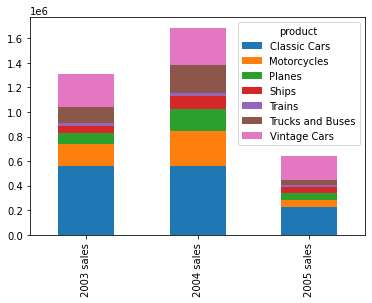

In [22]:
usa_products = product_breakdown(data)

In [26]:
# another way to visualize the same data above; using subplots and a pie chart 

def product_pie_chart(data):

    # save desired country as a variable
    country = input(f'select a country from the country list: {country_list}')

    # pull the data for that specific country

    country_df = data.loc[data['COUNTRY'] == country]

    # 2003
    df_2003 = country_df.loc[pd.DatetimeIndex(country_df['ORDERDATE']).year == 2003]

    # 2004
    df_2004 = country_df.loc[pd.DatetimeIndex(country_df['ORDERDATE']).year == 2004]

    # 2005
    df_2005 = country_df.loc[pd.DatetimeIndex(country_df['ORDERDATE']).year == 2005]

    # analysis of country sales for 2003
    grouped_productline_2003 = df_2003.groupby(['COUNTRY', 'PRODUCTLINE']).agg({'SALES': ['sum']})
    indexed_2003  = grouped_productline_2003.reset_index()
    indexed_2003.columns = ['country', 'product', '2003 sales']

    # analysis of country sales for 2004
    grouped_productline_2004 = df_2004.groupby(['COUNTRY', 'PRODUCTLINE']).agg({'SALES': ['sum']})
    indexed_2004  = grouped_productline_2004.reset_index()
    indexed_2004.columns = ['country', 'product', '2004 sales']

    # analysis of country sales for 2005
    grouped_productline_2005 = df_2005.groupby(['COUNTRY', 'PRODUCTLINE']).agg({'SALES': ['sum']})
    indexed_2005  = grouped_productline_2005.reset_index()
    indexed_2005.columns = ['country', 'product', '2005 sales']

    # merge the two dataframes
    merged_df = pd.merge(indexed_2003, indexed_2004, how ='outer', left_on=['country', 'product'], right_on=['country', 'product'])

    # merge the final dataframes
    complete_df = pd.merge(merged_df, indexed_2005, how ='outer', left_on=['country', 'product'], right_on=['country', 'product'])

    # compile the data for graphing; drop the unnecessary country index
    t = complete_df.set_index('product').transpose()
    t.drop(['country'], inplace=True)

    t.fillna(0, inplace=True)

    plt.rcParams['figure.figsize'] = (13,7)
    plt.rcParams['font.size'] = 12.0
    plt.rcParams['font.weight'] = 6

    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return ' ${v:d}'.format(v = val)
        return my_format

    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77']

    explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
    fig1, ax1 = plt.subplots()
    pie1 = ax1.pie(t.iloc[0].values, colors = colors, labels = t.columns, autopct = autopct_format(t.iloc[0].values), startangle = 90, explode = explode)
    fraction_text_list = pie1[2]
    for text in fraction_text_list:
        text.set_rotation(315)
    center_circle = plt.Circle((0,0), 0.80, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    ax1.axis('equal')
    # label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
    plt.tight_layout()


    fig2, ax2 = plt.subplots()
    pie2 = ax2.pie(t.iloc[1].values, colors = colors, labels = t.columns, autopct = autopct_format(t.iloc[1].values), startangle = 90, explode = explode)
    fraction_text_list = pie2[2]
    for text in fraction_text_list:
        text.set_rotation(315)
    center_circle = plt.Circle((0,0), 0.80, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    ax2.axis('equal')
    # label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
    plt.tight_layout()

    fig3, ax3 = plt.subplots()
    pie3 = ax3.pie(t.iloc[2].values, colors = colors, labels = t.columns, autopct = autopct_format(t.iloc[2].values), startangle = 90, explode = explode)
    fraction_text_list = pie3[2]
    for text in fraction_text_list:
        text.set_rotation(315)
    center_circle = plt.Circle((0,0), 0.80, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    ax3.axis('equal')
    # label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
    plt.tight_layout()

    return plt.show()



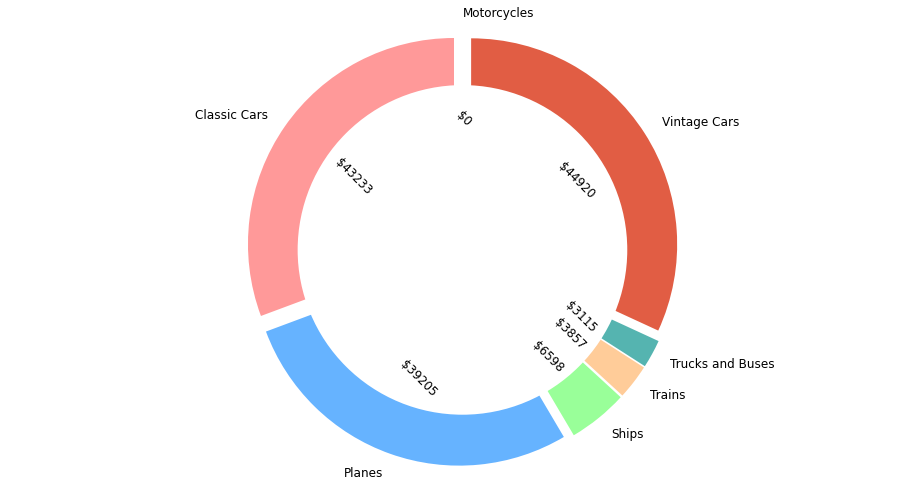

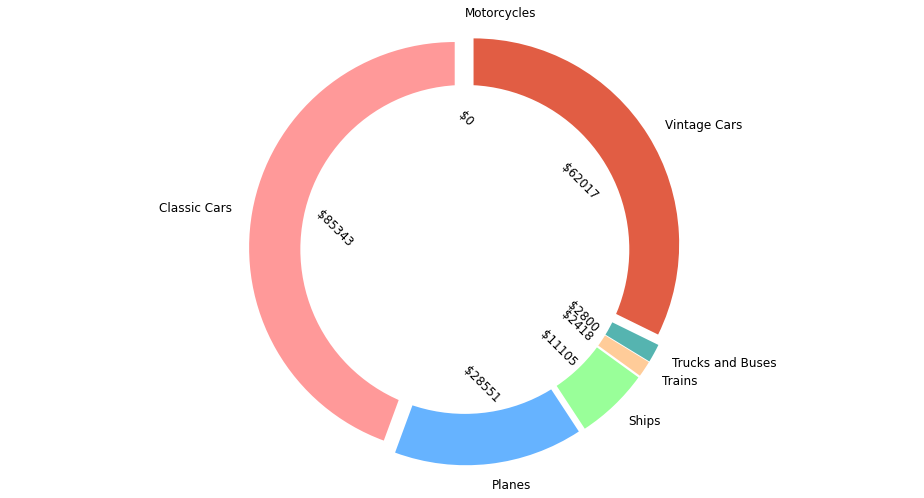

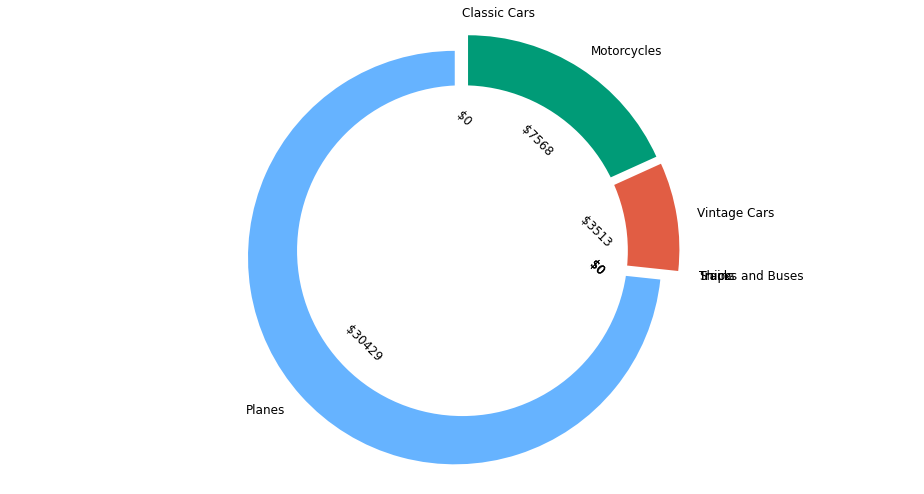

In [27]:
italy_product_pie = product_pie_chart(data)

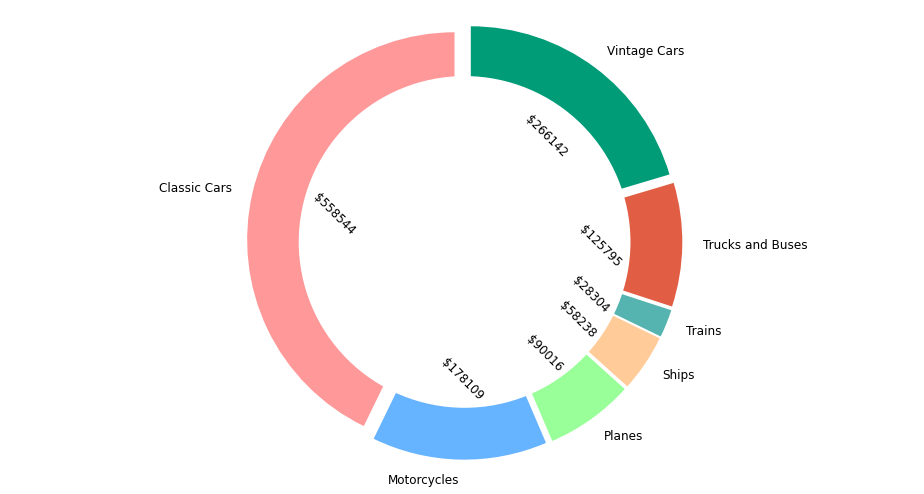

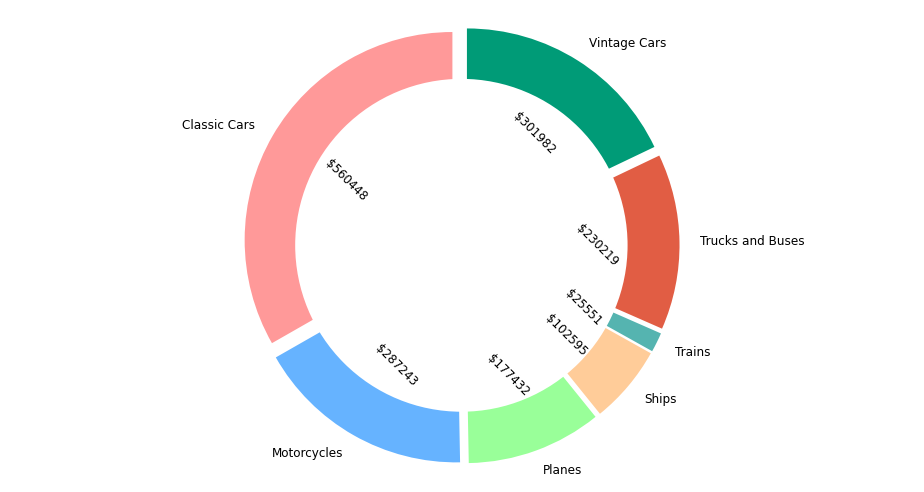

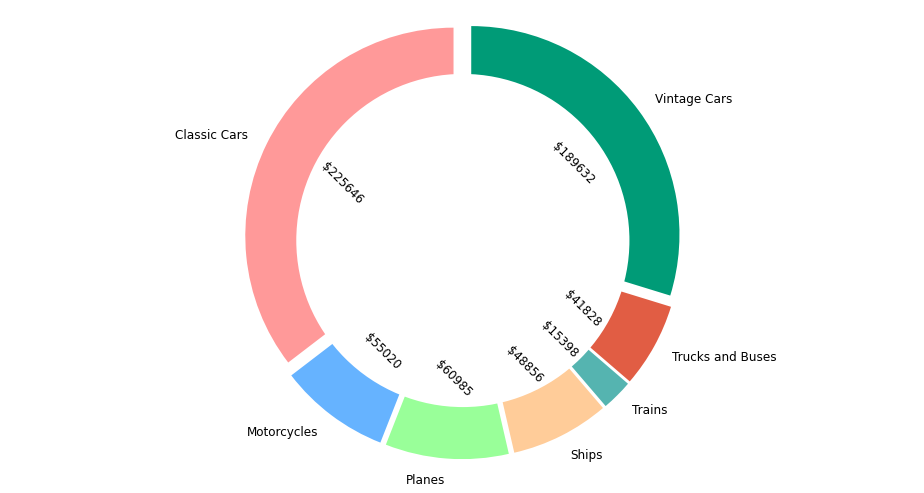

In [28]:
usa_pie_product = product_pie_chart(data)

# Working with Outliers


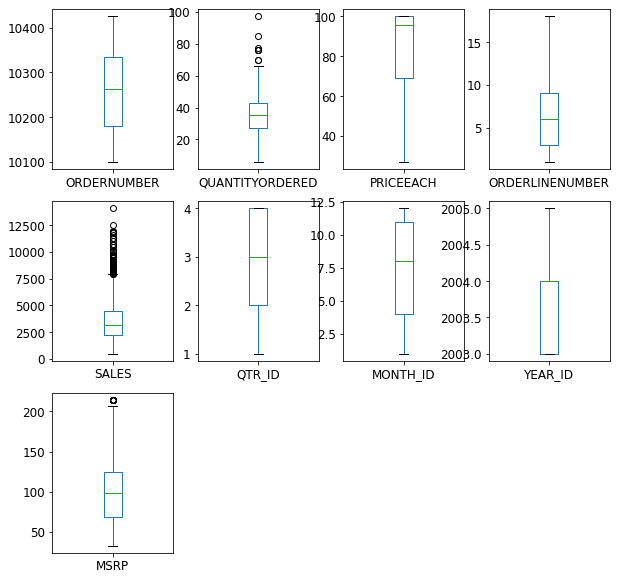

In [29]:
# here is a helpful tidbit of code from a kaggle user when working with outliers

import matplotlib.pyplot as plt

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

original shape of dataset : (2823, 20)
filtered dataset shape :  (2719, 20)


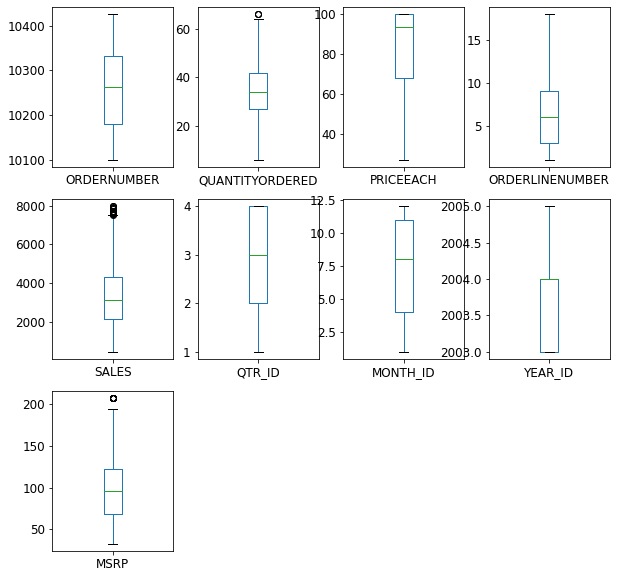

In [30]:
print('original shape of dataset :',data.shape)

cols = ['SALES', 'MSRP','QUANTITYORDERED']
new_df = data[cols]

#calculation 
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR

#filter outlier 
cond = (new_df <= maximum) & (new_df >= minimum)

cond = cond.all(axis=1)
data = data[cond]
print('filtered dataset shape : ',data.shape)

#plot again to check that if has any outlier
data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

# Reviewing GDP/Population Numbers

In [31]:
country_info_path = 'Data/population_total_long.csv'

country_info_df = pd.read_csv(country_info_path)

country_info_df.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [32]:
# replace the values to match the column values

country_info_df['Country Name'].replace('United States', 'USA', inplace=True)
country_info_df['Country Name'].replace('United Kingdom', 'UK', inplace=True)

In [33]:
# np.where goes into a dataset and returns the indeces of values that meet a condition or set of conditions

years = [2003, 2004, 2005]

idx = np.where(
    (country_info_df['Year'].isin(years)) & country_info_df['Country Name'].isin(data['COUNTRY'])
    )

In [34]:
# save the rows w/ matching index values into a new dataframe
relevant_population_data = country_info_df.loc[idx]

relevant_population_data.head()

,Country Name,Year,Count
9326,Australia,2003,19895400
9327,Austria,2003,8121423
9330,Belgium,2003,10376133
9348,Canada,2003,31644028
9349,Switzerland,2003,7339001


In [35]:
## need to get USA and UK into the dataframe
usa = country_info_df[country_info_df['Country Name'].str.contains('United States', case = False)]

uk = country_info_df[country_info_df['Country Name'].str.contains('United Kingdom', case = False)]

In [36]:
# average the population data
average_population = relevant_population_data.groupby(['Country Name']).agg({'Count': ['mean']})

# reset the index
average_population.reset_index(inplace=True)

# rename columns
average_population.columns = ['country', 'average_population']

average_population.head()



,country,average_population
0,Australia,2.013920e+07
1,Austria,8.173739e+06
2,Belgium,1.042530e+07
3,Canada,3.194281e+07
4,Denmark,5.404843e+06


In [37]:
# now extract the rows that I want to analyze
sales_by_country.head()

,country,total_sales
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46


In [38]:
# merge the two dataframes together
pop_by_sales = pd.merge(sales_by_country, average_population, how ='left', left_on=['country'], right_on=['country'])

pop_by_sales.shape

(19, 3)

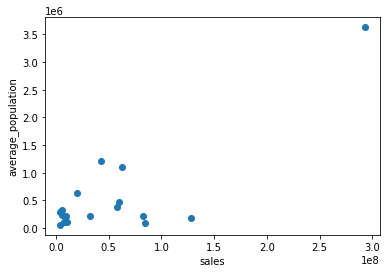

In [39]:
# simple linear regression using sales as the target (dependent variable) and population (independent variable)
%matplotlib inline
plt.xlabel('sales')
plt.ylabel('average_population')
plt.scatter(pop_by_sales['average_population'], pop_by_sales['total_sales'])

In [40]:
# create the model
reg = linear_model.LinearRegression()
reg.fit(pop_by_sales[['average_population']], pop_by_sales.total_sales)

LinearRegression()

In [41]:
m = reg.coef_

b = reg.intercept_

m*3000000000 + b

array([29029382.64780349])

# Status by Country

In [42]:
# obtain the values of the percentage of orders fulfilled/not processed

status_df = data[['COUNTRY', 'STATUS']]

grouped_status_df = status_df.groupby(['COUNTRY', 'STATUS']).agg({'STATUS': ['count']})

In [43]:
grouped_status_df.head()

STATUS
                      count
COUNTRY   STATUS           
Australia Disputed        5
          In Process     13
          Shipped       158
Austria   Resolved        8
          Shipped        45